In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
sample = "2Mu2E_100GeV_0p25GeV_20mm"
samples = [
        sample
#    "2Mu2E_100GeV_0p25GeV_0p02mm",
#    "2Mu2E_100GeV_0p25GeV_0p2mm",
#    "2Mu2E_100GeV_0p25GeV_2mm",
#    "2Mu2E_100GeV_0p25GeV_10mm",
#    "2Mu2E_100GeV_0p25GeV_20mm"
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", "barrelE","endcapE"]
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra", "base", "lepton_genA_base"

    ],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]
hists = out[sample]["hists"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  endcapE
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  endcapE
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  endcapE
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  endcapE
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  endcapE


Plots compare three separate channels:

Channel0 only includes the electrons that have passed the loose ID (barrel and endcap)

Channel1 includes all barrel electrons (but without any ID requirements applied)

Channel2 includes all endcap electrons (but without any ID requirements applied)

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

Text(1, 0, 'Δηseed')

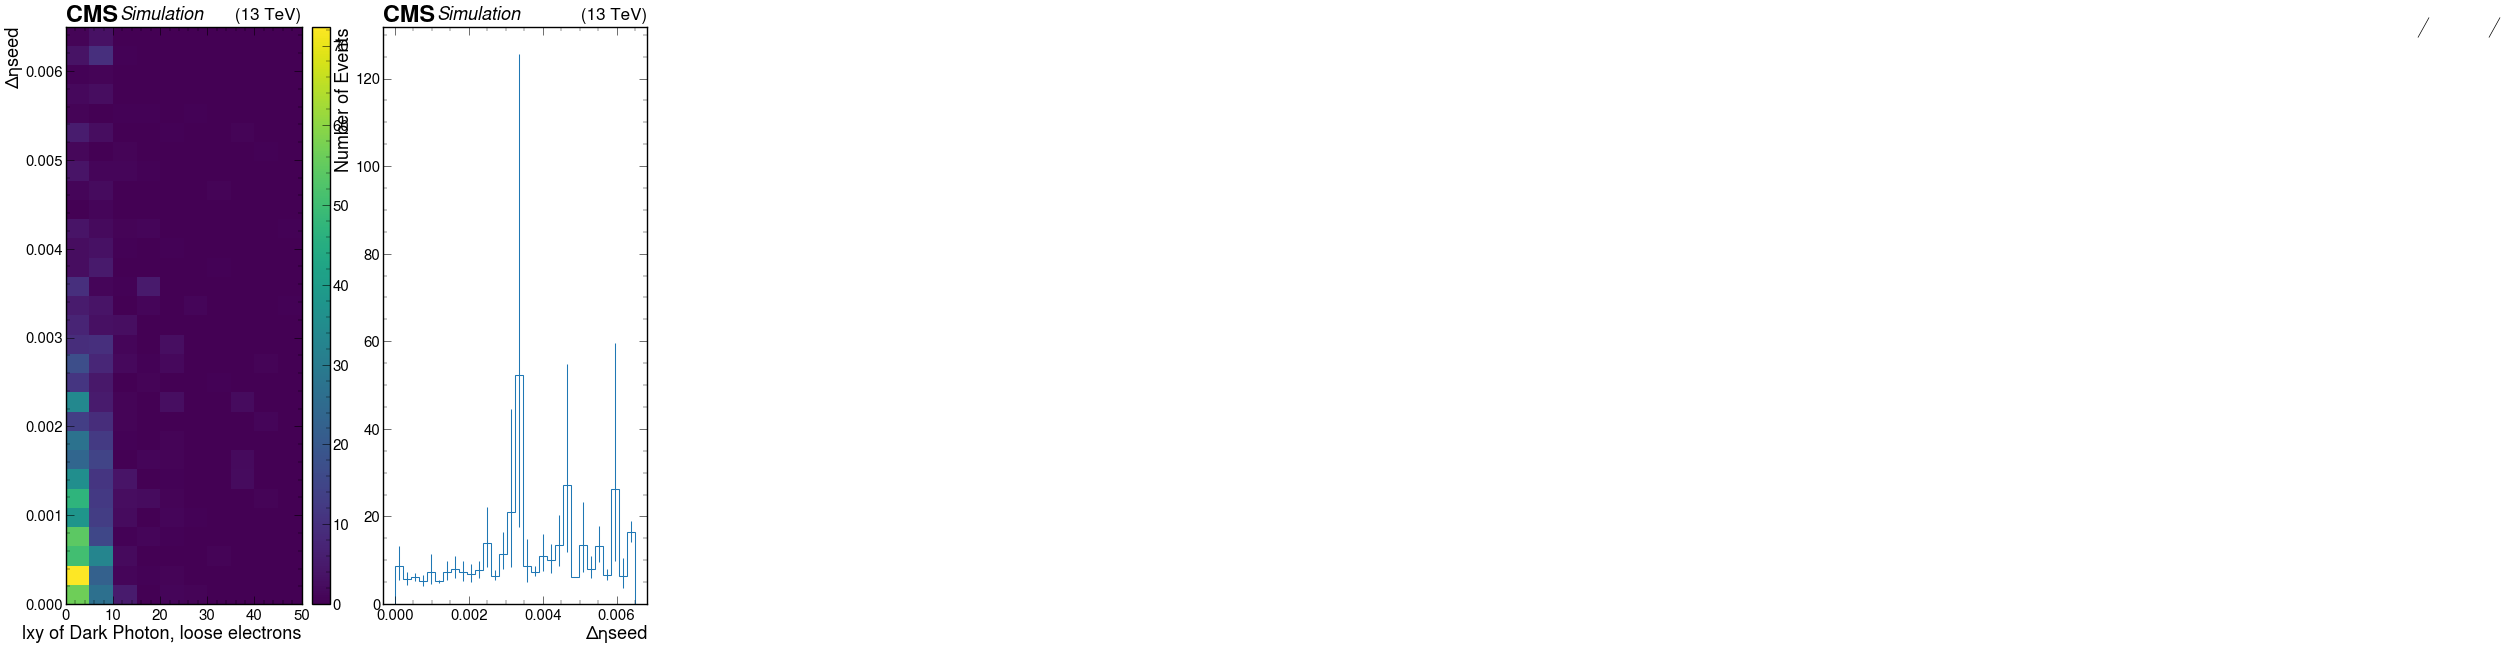

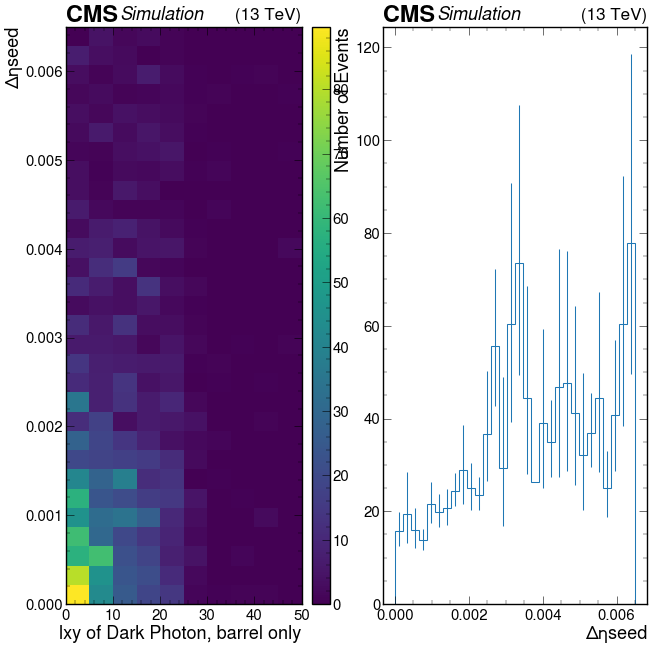

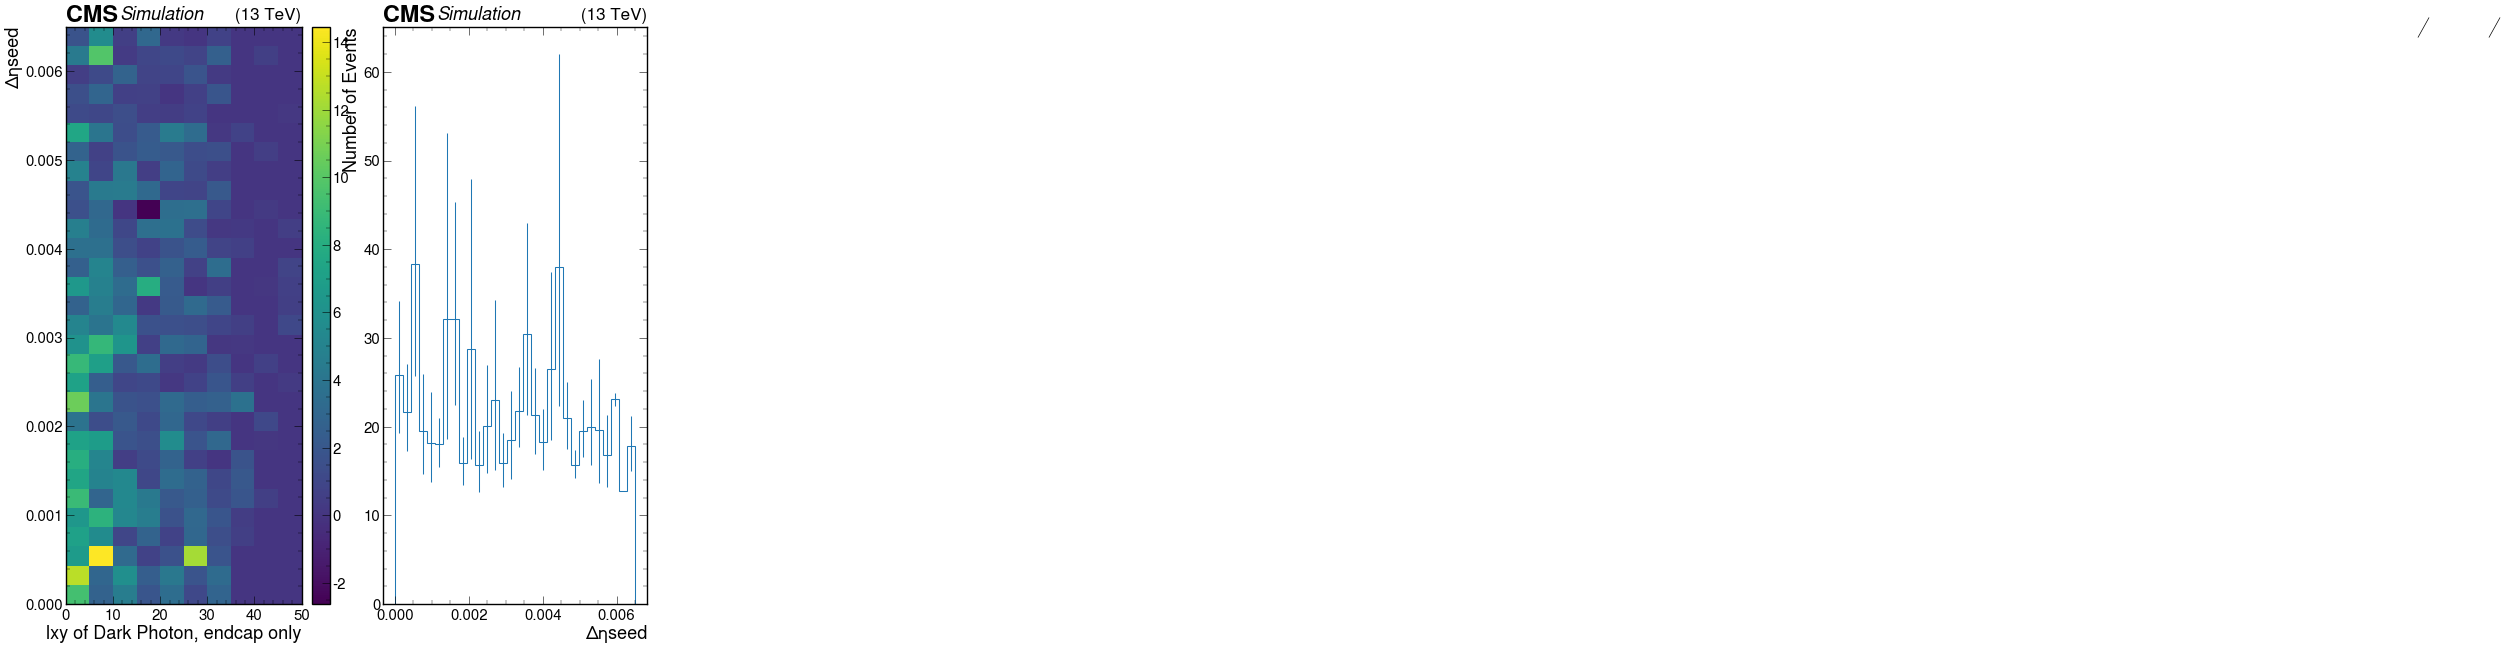

In [3]:
plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, loose electrons")
plt.ylabel("Δηseed")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Δηseed")

plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :, :], label = sample, flow=True)
plt.xlabel("lxy of Dark Photon, barrel only")
plt.ylabel("Δηseed")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Δηseed")

plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, endcap only")
plt.ylabel("Δηseed")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Δηseed")


The different colors are numbers of events, each distribution of the lxy is one projection.

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

Text(1, 0, 'Δφin')

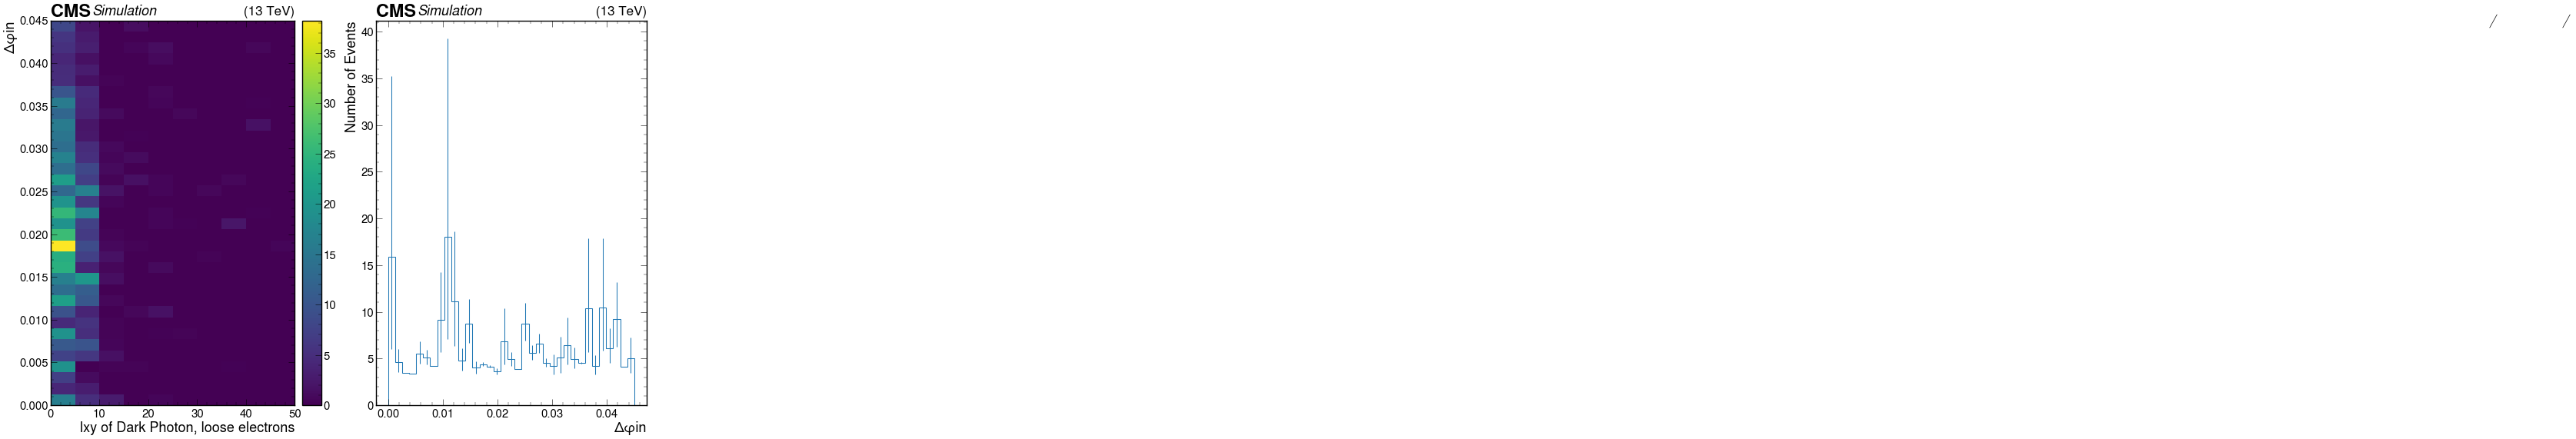

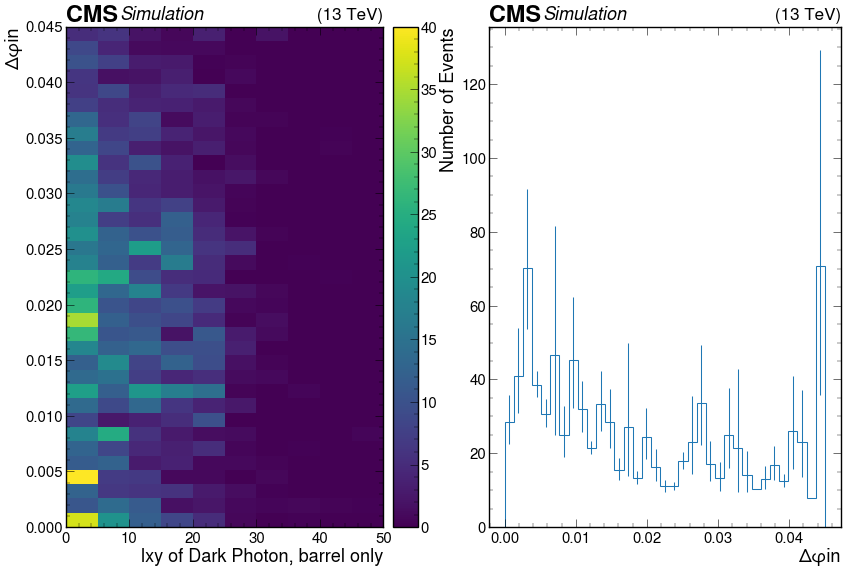

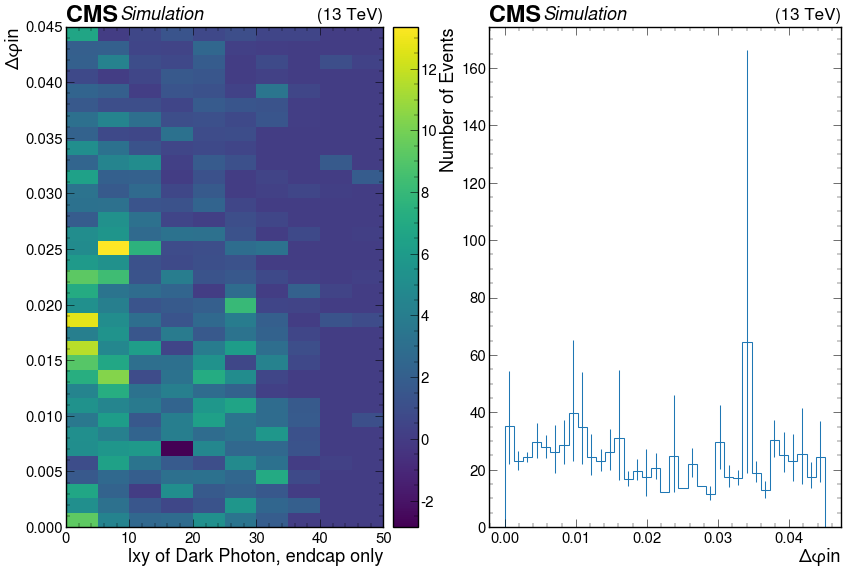

In [4]:
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, loose electrons")
plt.ylabel("Δφin")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Δφin")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :], label = sample, flow=True)
plt.xlabel("lxy of Dark Photon, barrel only")
plt.ylabel("Δφin")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Δφin")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2], :, :], label = sample, flow=True)
plt.xlabel("lxy of Dark Photon, endcap only")
plt.ylabel("Δφin")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Δφin")


# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.


/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(1, 0, '1/E − 1/p')

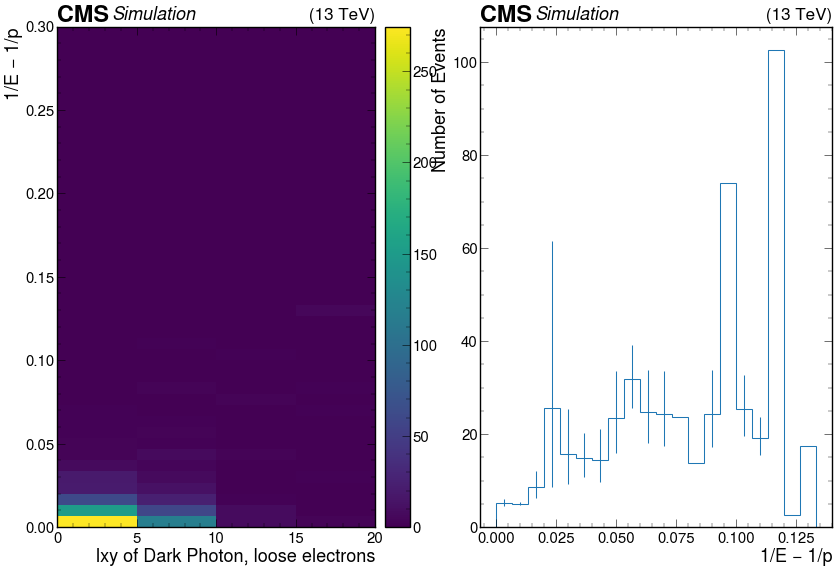

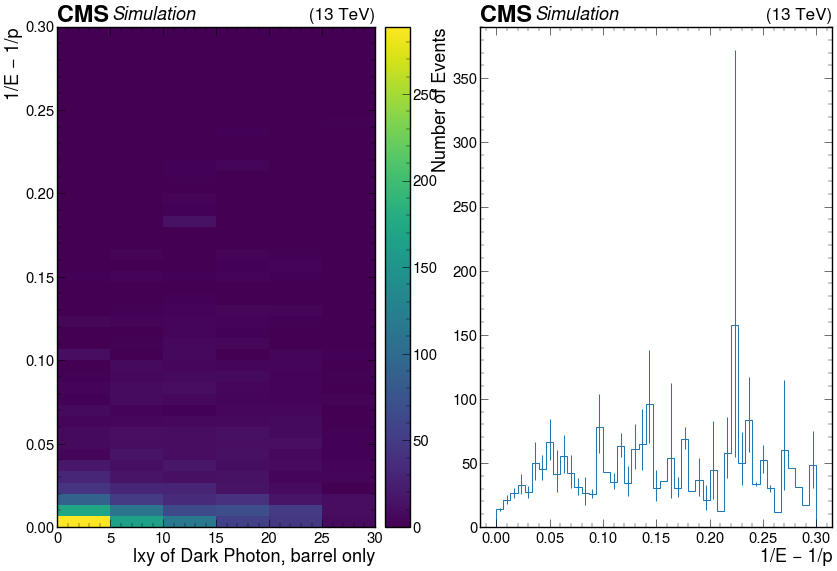

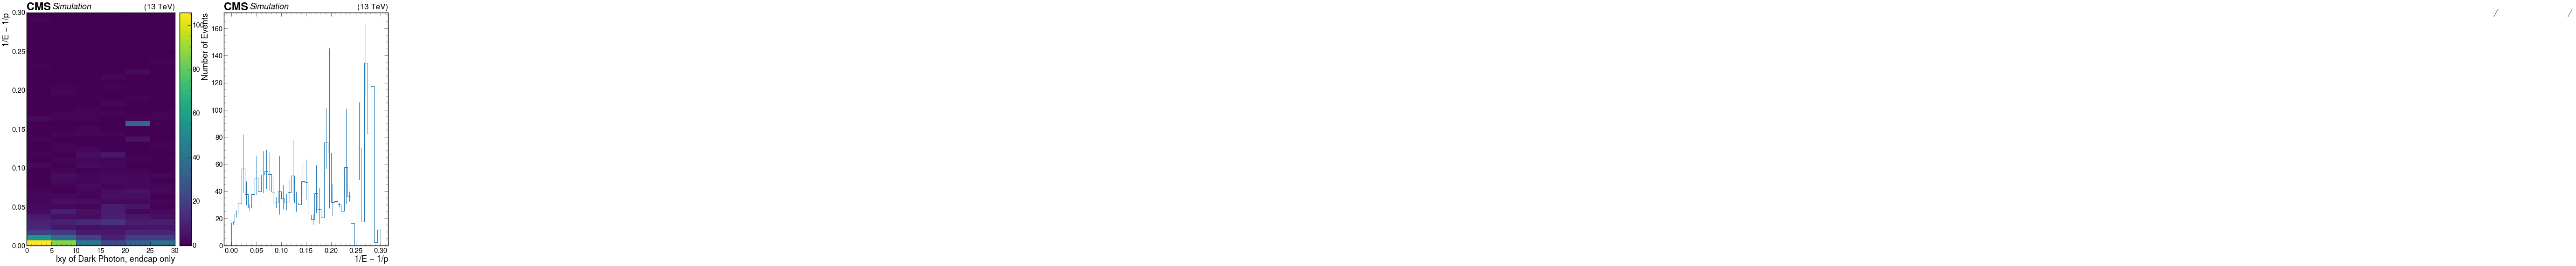

In [5]:
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, loose electrons")
plt.ylabel("1/E − 1/p")
plt.xlim(0,20)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("1/E − 1/p")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :, :], label = sample,flow=True)
plt.xlabel("lxy of Dark Photon, barrel only")
plt.ylabel("1/E − 1/p")
plt.xlim(0,30)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("1/E − 1/p")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, endcap only")
plt.ylabel("1/E − 1/p")
plt.xlim(0,30)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("1/E − 1/p")

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

Text(1, 0, 'Isolation')

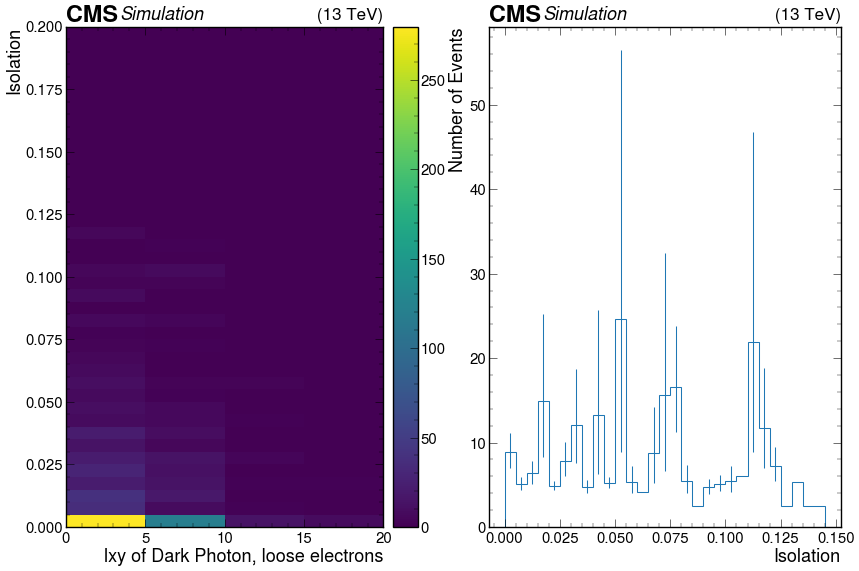

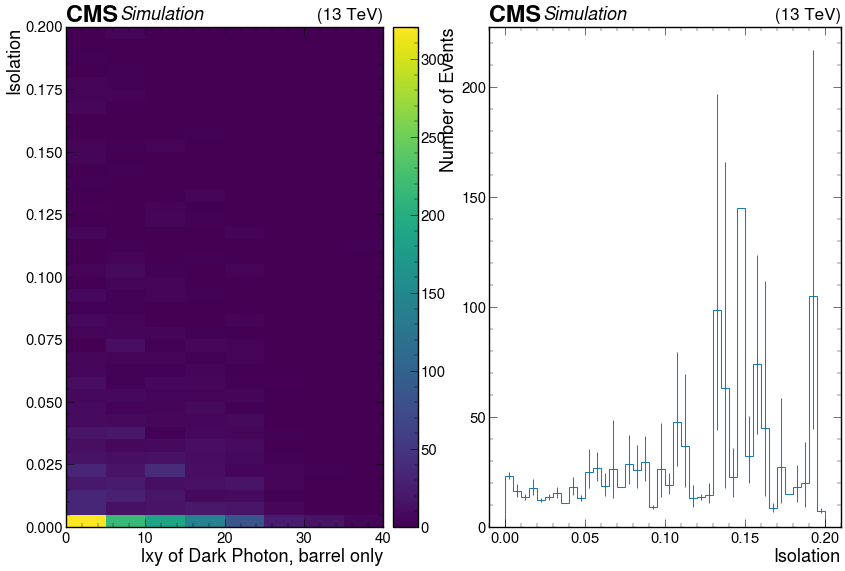

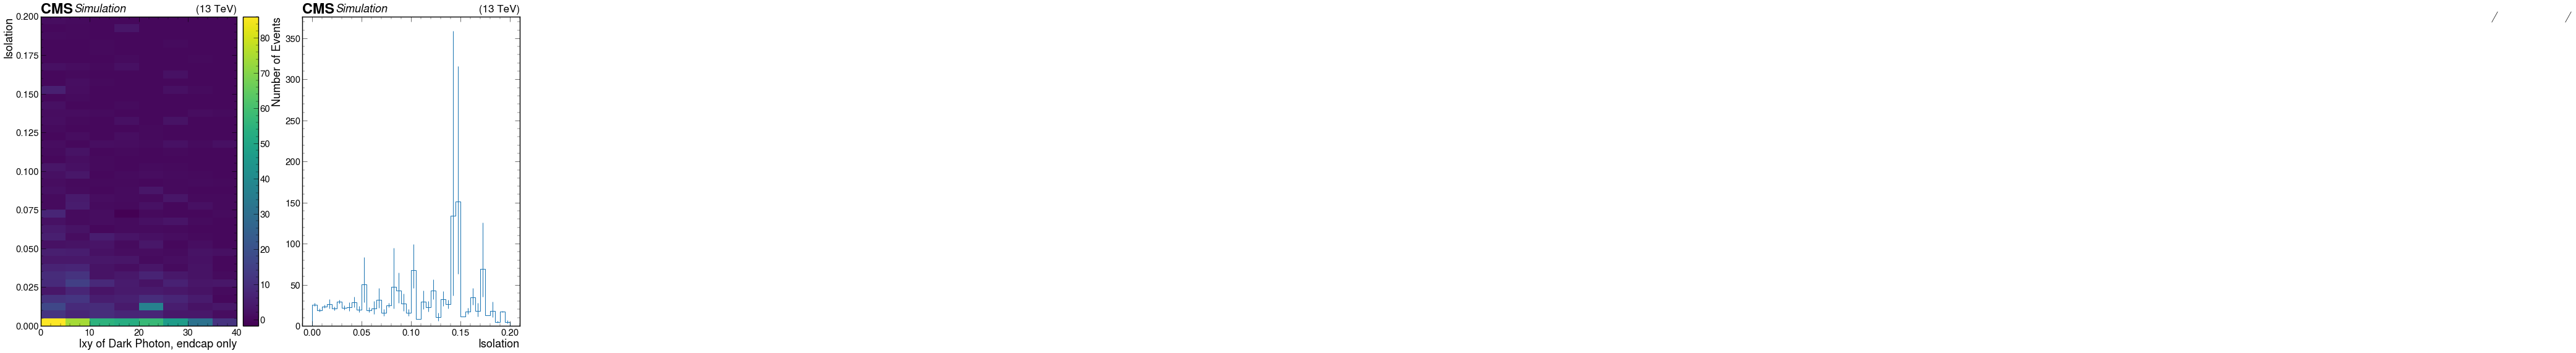

In [6]:
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, loose electrons")
plt.ylabel("Isolation")
plt.xlim(0,20)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Isolation")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :, :], label = sample,flow=True)
plt.xlabel("lxy of Dark Photon, barrel only")
plt.ylabel("Isolation")
plt.xlim(0,40)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Isolation")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, endcap only")
plt.ylabel("Isolation")
plt.xlim(0,40)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Isolation")

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

Text(1, 0, 'σiηiη')

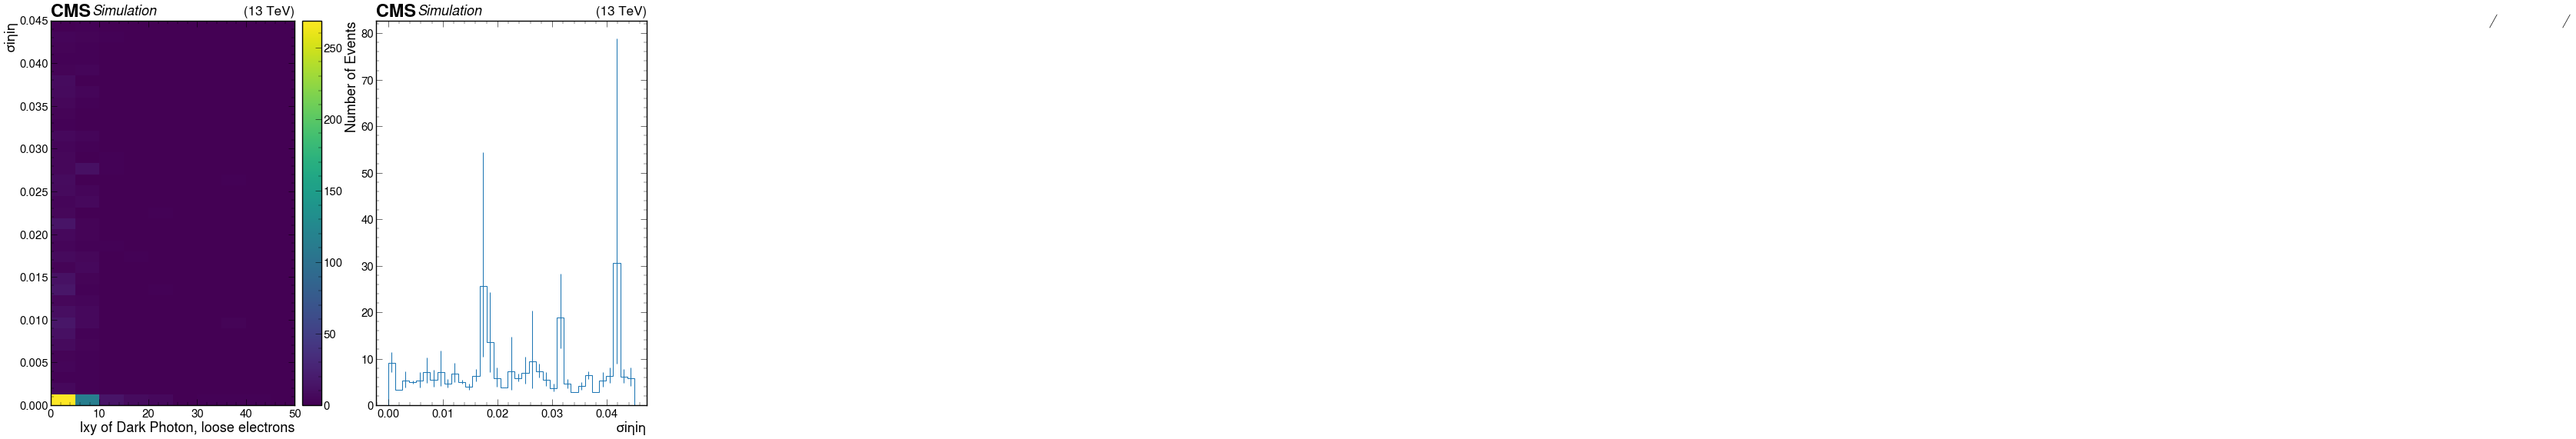

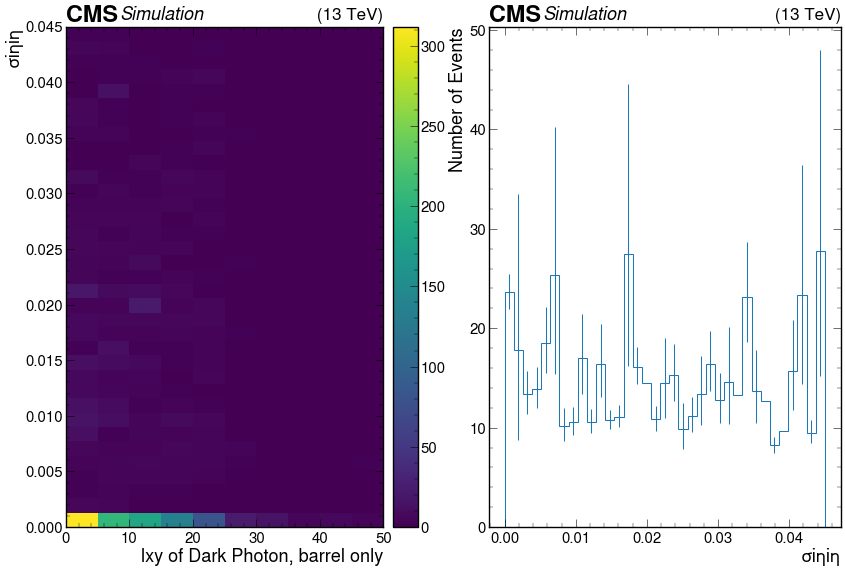

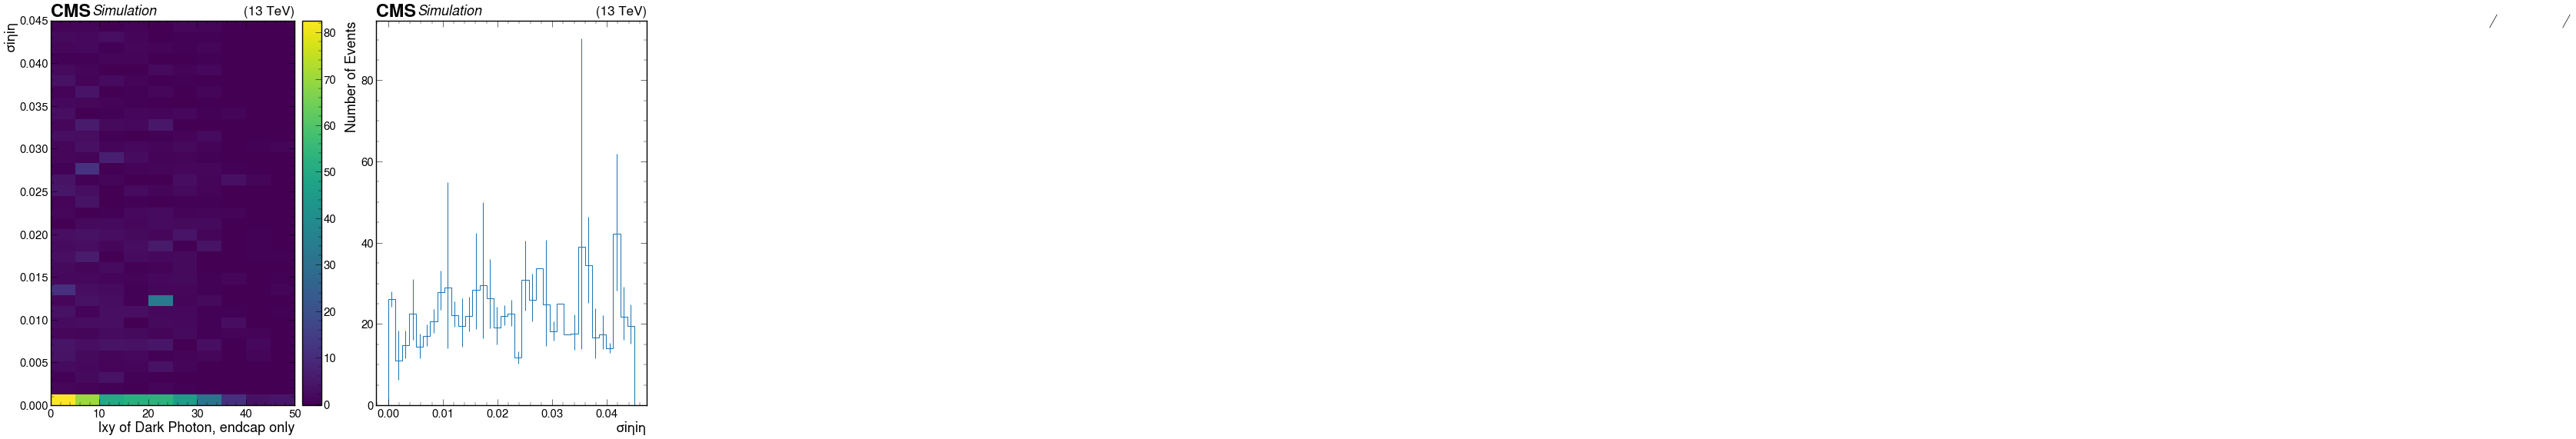

In [7]:
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, loose electrons")
plt.ylabel("σiηiη")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("σiηiη")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :, :], label = sample,flow=True)
plt.xlabel("lxy of Dark Photon, barrel only")
plt.ylabel("σiηiη")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("σiηiη")


plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, endcap only")
plt.ylabel("σiηiη")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("σiηiη")


# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

Text(1, 0, 'Conversion veto')

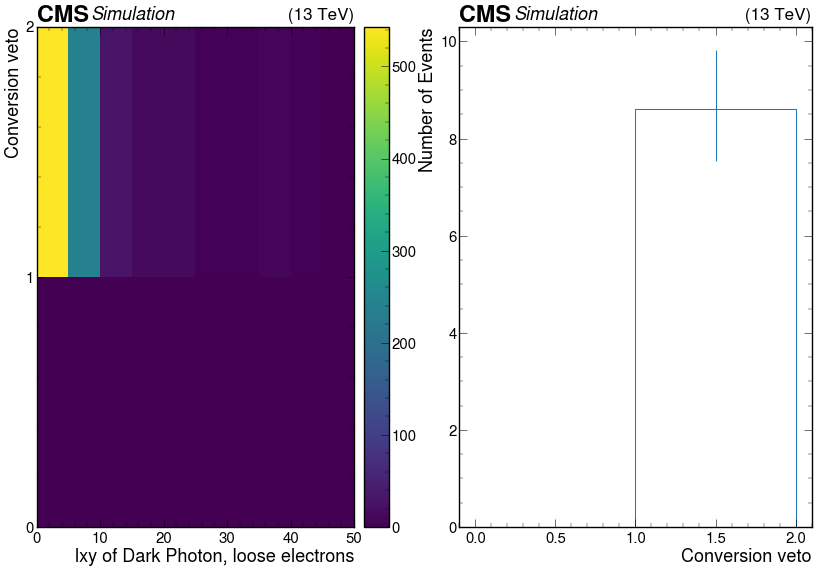

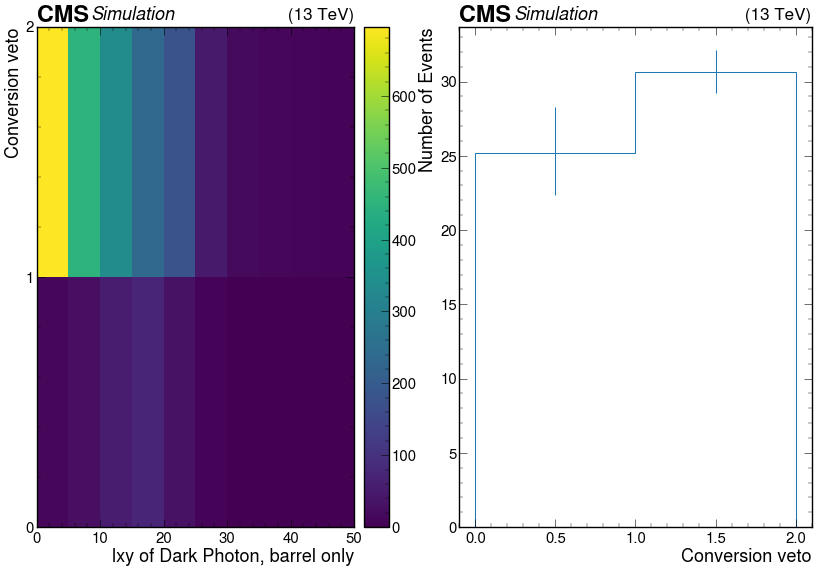

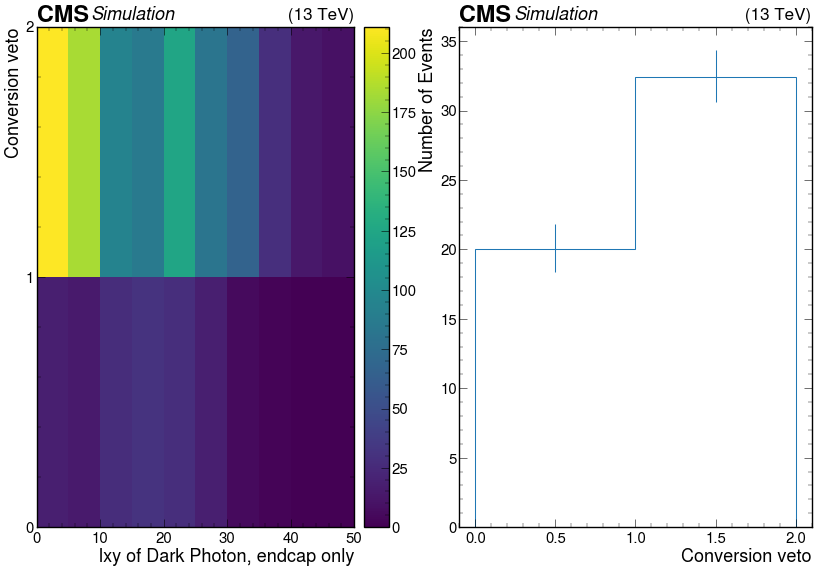

In [8]:
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, loose electrons")
plt.ylabel("Conversion veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Conversion veto")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :, :], label = sample,flow=True)
plt.xlabel("lxy of Dark Photon, barrel only")
plt.ylabel("Conversion veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Conversion veto")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, endcap only")
plt.ylabel("Conversion veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("Conversion veto")

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(1, 0, 'H/E')

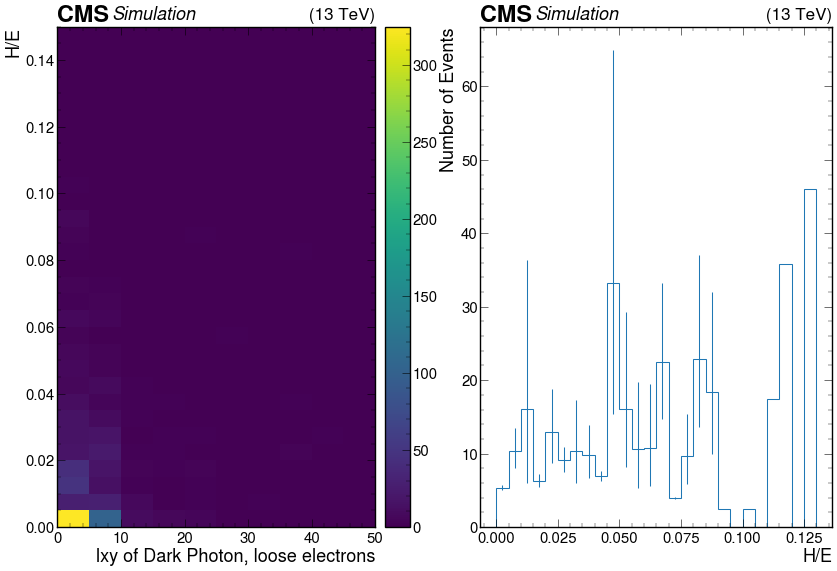

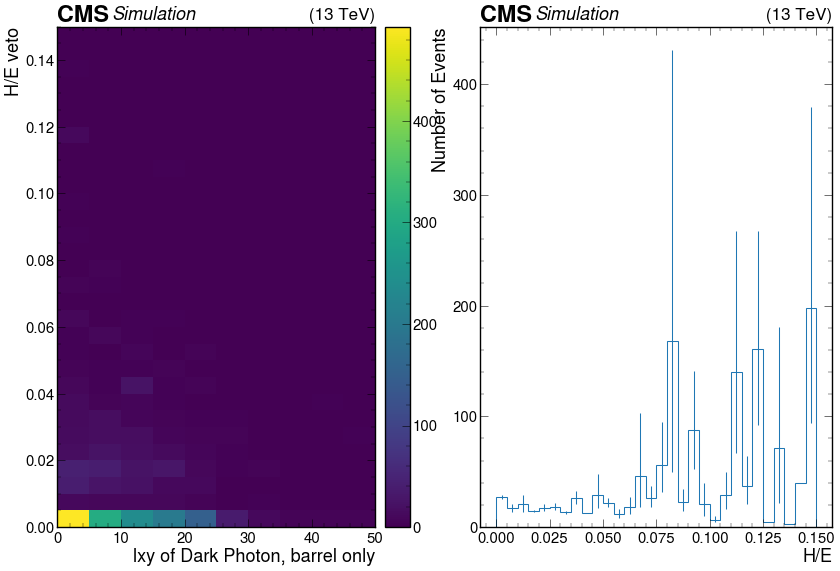

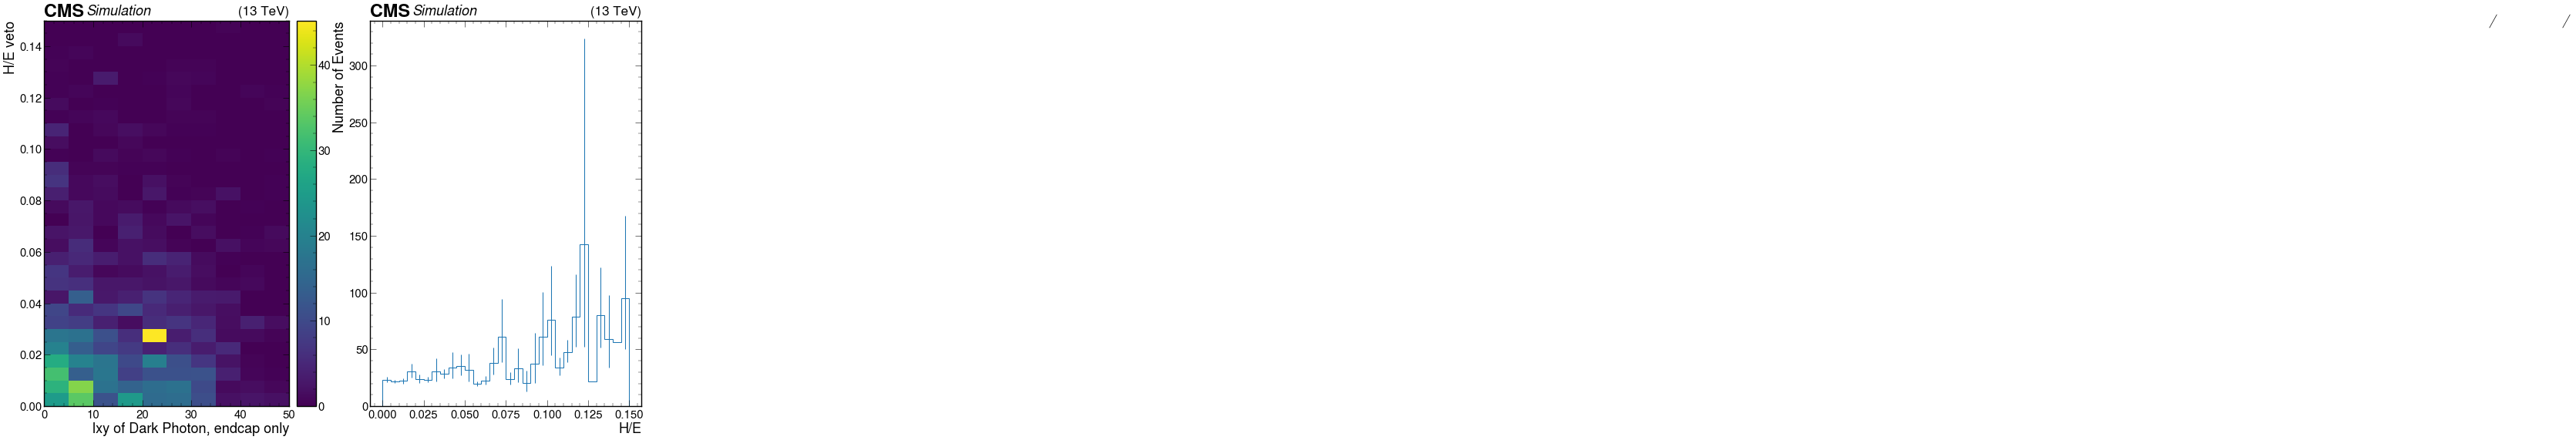

In [9]:
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, loose electrons")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("H/E")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :, :], label = sample,flow=True)
plt.xlabel("lxy of Dark Photon, barrel only")
plt.ylabel("H/E veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("H/E")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[2], :, :], label = sample)
plt.xlabel("lxy of Dark Photon, endcap only")
plt.ylabel("H/E veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[2], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events")
plt.xlabel("H/E")

# Expected missing inner hits:

number of missing hits expected for GSF track.

Text(1, 0, 'Expected Missing Inner Hits')

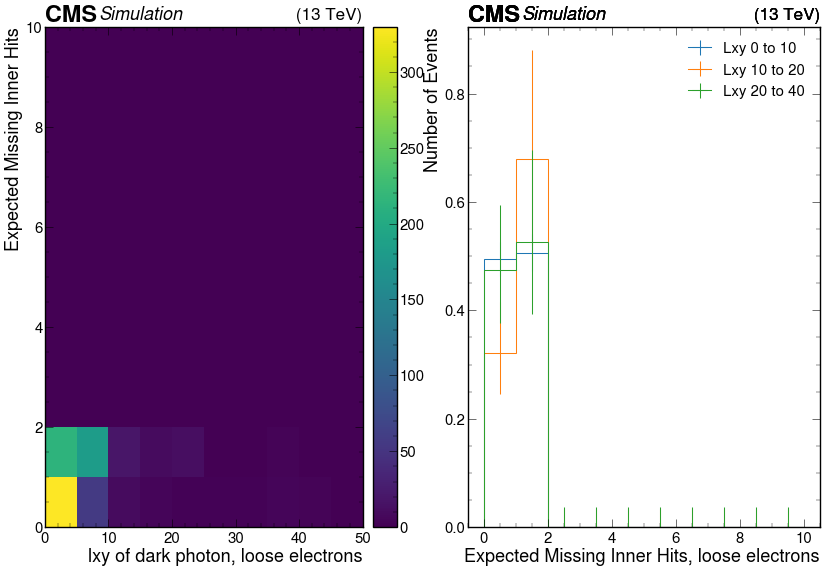

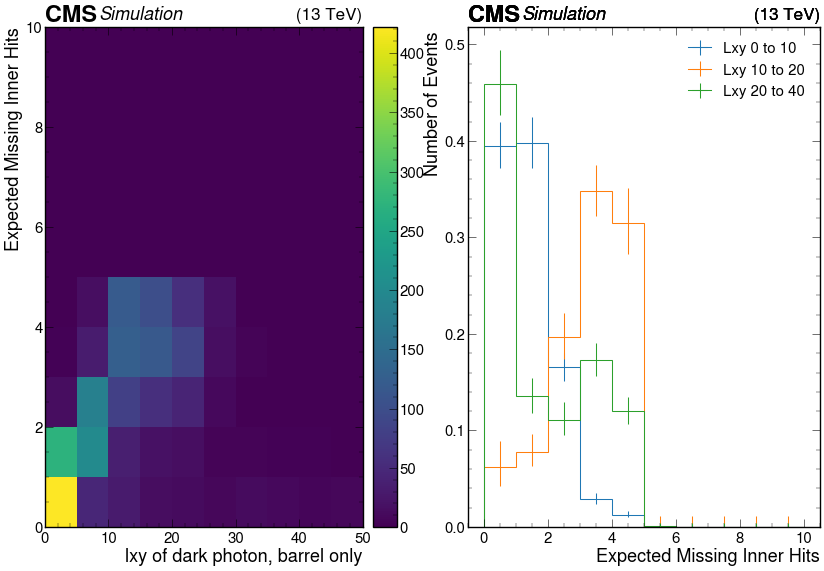

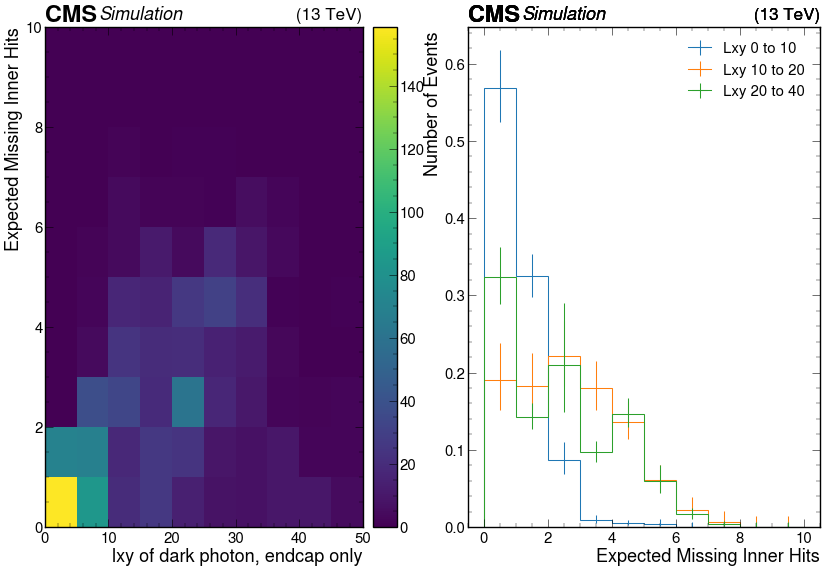

In [10]:
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of dark photon, loose electrons")
plt.ylabel("Expected Missing Inner Hits")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy 20 to 40",density=True)
plt.legend()
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Inner Hits, loose electrons")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :, :], label = sample, flow=True)
plt.xlabel("lxy of dark photon, barrel only")
plt.ylabel("Expected Missing Inner Hits")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy 20 to 40",density=True)
plt.legend()
plt.ylabel("Number of Events ")
plt.xlabel("Expected Missing Inner Hits")

plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2], :, :], label = sample, flow=True)
plt.xlabel("lxy of dark photon, endcap only")
plt.ylabel("Expected Missing Inner Hits")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy 20 to 40",density=True)
plt.legend()
plt.ylabel("Number of Events ")
plt.xlabel("Expected Missing Inner Hits")